<a href="https://colab.research.google.com/github/yuyangweng/Project/blob/main/peak_fitting_pseudo_voigt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
from lmfit import Model
from numpy import exp, pi, sqrt
import matplotlib.pyplot as plt
from lmfit.models import PseudoVoigtModel
from scipy.signal import find_peaks,peak_widths

In [4]:
data_path = '/content/drive/MyDrive/THK-reload-1_2.csv'
headers = ['raman_shift', 'intensity']
df = pd.read_csv(data_path, names=headers)

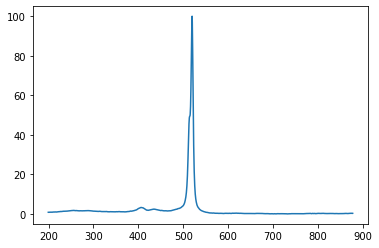

In [5]:
plt.plot(df.raman_shift,df.intensity)

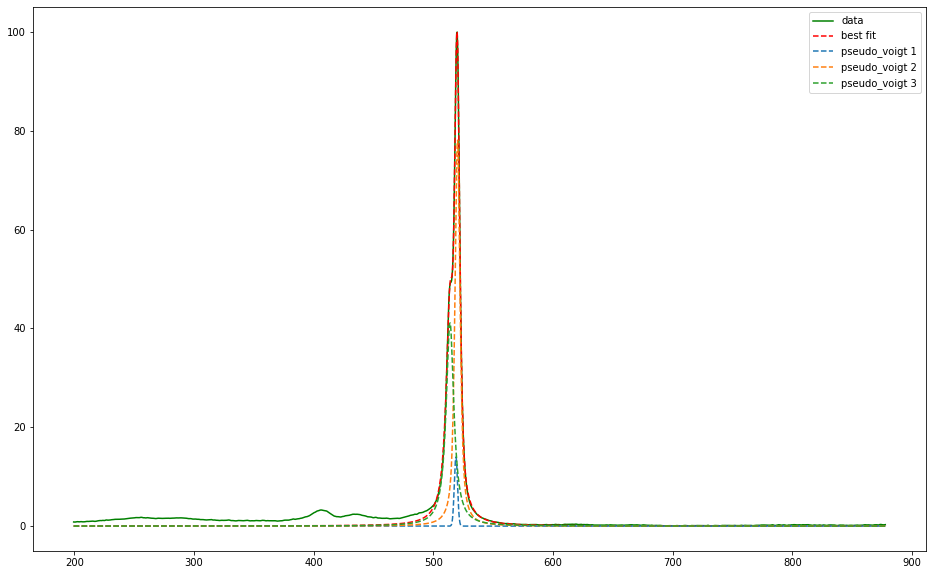

In [6]:
x=df.raman_shift
y=df.intensity


pv_model_1 = PseudoVoigtModel(prefix='pv_1')
pv_model_2 = PseudoVoigtModel(prefix='pv_2')
pv_model_3 = PseudoVoigtModel(prefix='pv_3')

pars=pv_model_1.guess(y, x=x)
pars+=pv_model_2.guess(y, x=x)
pars+=pv_model_3.guess(y, x=x)


pars['pv_1amplitude'].set(min=y.min())
pars['pv_2amplitude'].set(min=y.min())
pars['pv_3amplitude'].set(min=y.min())



pseudo_voigt_model=pv_model_1+pv_model_2+pv_model_3
result = pseudo_voigt_model.fit(y, pars, x=x)
comps = result.eval_components(x=x)
plt.figure(figsize=(16, 10))
plt.plot(x, y,'g',label='data')
plt.plot(x, result.best_fit, 'r--',label='best fit ')
plt.plot(x, comps['pv_1'], '--', label='pseudo_voigt 1')
plt.plot(x, comps['pv_2'], '--', label='pseudo_voigt 2')
plt.plot(x, comps['pv_3'], '--', label='pseudo_voigt 3')
plt.legend()
plt.show()


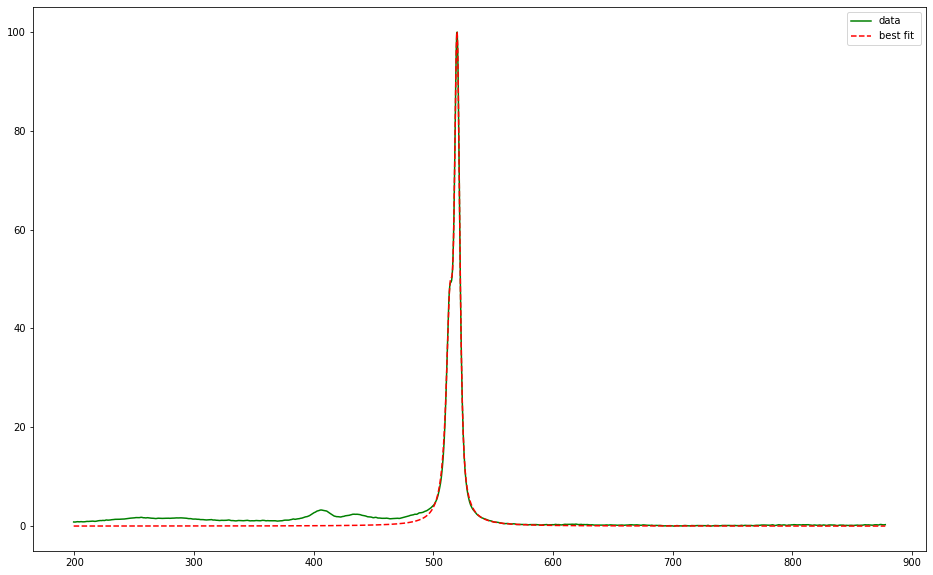

In [7]:
plt.figure(figsize=(16, 10))
plt.plot(x, y,'g',label='data')
plt.plot(x, result.best_fit, 'r--',label='best fit ')
plt.legend()
plt.show()

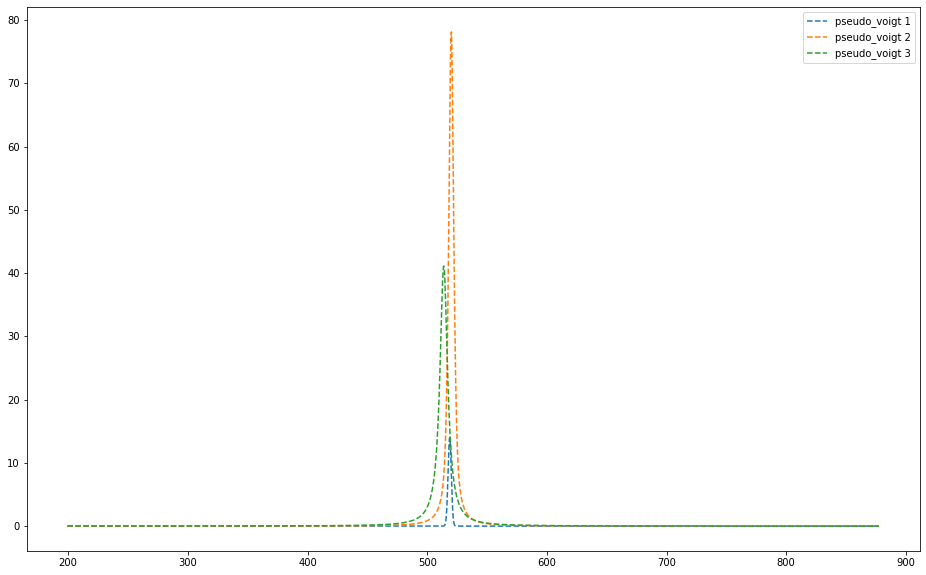

In [8]:
plt.figure(figsize=(16, 10))
plt.plot(x, comps['pv_1'], '--', label='pseudo_voigt 1')
plt.plot(x, comps['pv_2'], '--', label='pseudo_voigt 2')
plt.plot(x, comps['pv_3'], '--', label='pseudo_voigt 3')
plt.legend()
plt.show()


<Figure size 1152x720 with 0 Axes>

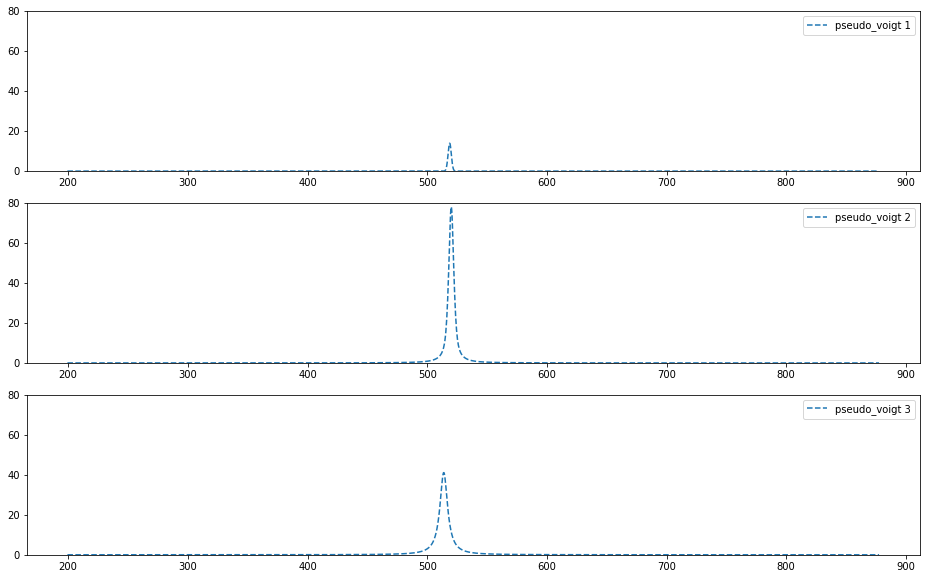

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(16, 10))

axes[0].plot(x, comps['pv_1'], '--', label='pseudo_voigt 1')
axes[0].set_ylim([0, 80])
axes[0].legend()

axes[1].plot(x, comps['pv_2'], '--', label='pseudo_voigt 2')
axes[1].set_ylim([0, 80])
axes[1].legend()

axes[2].plot(x, comps['pv_3'], '--', label='pseudo_voigt 3')
axes[2].set_ylim([0, 80])
axes[2].legend()


plt.legend()
plt.show()

In [9]:
result.params

name,value,standard error,relative error,initial value,min,max,vary,expression
pv_1amplitude,47.7476008,103.540416,(216.85%),1236.758929874995,0.00000000,inf,True,
pv_1center,518.801800,0.69478411,(0.13%),518.8758826310556,-inf,inf,True,
pv_1sigma,1.60164927,0.61019362,(38.10%),3.298023812999986,0.00000000,inf,True,
pv_1fraction,2.4299e-04,1.47892943,(608650.02%),0.5,0.00000000,1.00000000,True,
pv_1fwhm,3.20329854,1.22038724,(38.10%),6.596047625999972,-inf,inf,False,2.0000000*pv_1sigma
pv_1height,14.0019303,21.2767390,(151.96%),147.75534853755306,-inf,inf,False,"(((1-pv_1fraction)*pv_1amplitude)/max(1e-15, (pv_1sigma*sqrt(pi/log(2))))+(pv_1fraction*pv_1amplitude)/max(1e-15, (pi*pv_1sigma)))"
pv_2amplitude,562.723554,128.230783,(22.79%),1236.758929874995,0.00000000,inf,True,
pv_2center,520.115202,0.35073434,(0.07%),518.8758826310556,-inf,inf,True,
pv_2sigma,2.54517642,0.16789633,(6.60%),3.298023812999986,0.00000000,inf,True,
pv_2fraction,0.76406242,0.04985199,(6.52%),0.5,0.00000000,1.00000000,True,
